In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearnex import patch_sklearn
patch_sklearn()
import sklearn.datasets

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


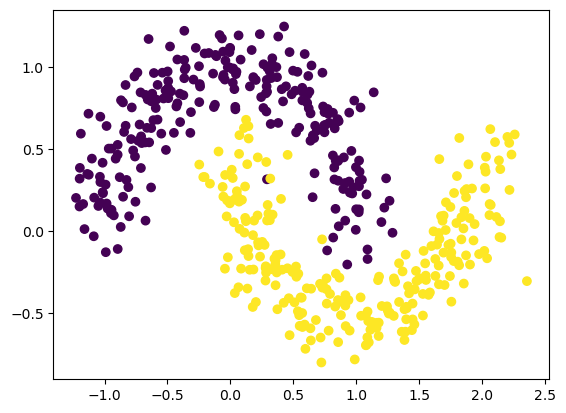

In [4]:
X,y = sklearn.datasets.make_moons(500, noise=0.15)
plt.scatter(X[:,0],X[:,1], c = y)

In [5]:
print(X.shape)
print(y.shape)

(500, 2)
(500,)


In [8]:
inputs = 2
outputs = 2 #2 uses softmax 1 uses sigmoid
samples = X.shape[0]
learning_rate = 0.001
lamb = 0.01

In [20]:
def retrieve(model):
    W1 = model['W1'];
    b1 = model['b1'];
    W2 = model['W2'];
    b2 = model['b2'];
    return W1, b1,W2,b2
def foward(X, model):
    W1, b1, W2, b2 = retrieve(model);
    z1 = X.dot(W1) + b1;
    a1 = np.tanh(z1);
    z2 = a1.dot(W2) + b2;
    expval = np.exp(z2);
    softmax = expval/np.sum(expval, axis = 1, keepdims = True);
    return z1, a1, softmax;
def crossentropy(softmax, y,model):
    W1, b1, W2, b2 = retrieve(model);
    m = np.zeros(500)
    for i, x in enumerate(y):
        predict = softmax[i][x];
        m[i] = predict;
    loss = np.sum(-np.log(m));
    #l2 loss regulation
    W1, b1, W2, b2 = retrieve(model);
    regloss = lamb/2*(np.sum(np.square(W1)) + np.sum(np.square(W2)))
    loss += regloss;
    return float(loss / y.shape[0]);
    
def backpropagation(x,y,model, epochs):
    for i in range(epochs):
        W1, b1, W2, b2 = retrieve(model);
        z1, a1, softmax = foward(x, model);
        delta3 = np.copy(softmax);
        delta3[range(x.shape[0]),y] -= 1;#(200x2)
        dw2 = (a1.T).dot(delta3) #(3x200) . (200x2) = (3x2)
        db2 = np.sum(delta3, axis =0, keepdims = True);
        delta2 = delta3.dot(W2.T) * (1-np.power(np.tanh(z1),2));
        dw1 = (x.T).dot(delta2) 
        db1 = np.sum(delta2, axis =0, keepdims = True);
        dw2+= lamb*np.sum(W2)
        dw1+= lamb*np.sum(W1)
        W1 += - learning_rate*dw1
        W2 += - learning_rate*dw2
        b1 += - learning_rate*db1
        b2 += - learning_rate*db2
        model = {'W1':W1, 'b1':b1,'W2':W2, 'b2':b2}
        if i%50 == 0 :
            print(softmax.shape)
            print(f"loss at epoch{i} is : {crossentropy(softmax, y, model)}")
    return model
                 
def initialization(input_dim, hidden_dim, output_dim):
    #Xavier
    model = {};
    W1 = np.random.randn(input_dim, hidden_dim)/np.sqrt(input_dim);
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, output_dim)/np.sqrt(hidden_dim);
    b2 = np.zeros((1, output_dim))
    model['W1'] = W1;
    model['b1'] = b1;
    model['W2'] = W2;
    model['b2'] = b2;
    
    return model
        

In [21]:
model = initialization(inputs,3,outputs)

model = backpropagation(X,y,model, 1500)

(500, 2)
loss at epoch0 is : 0.8549696844897117
(500, 2)
loss at epoch50 is : 0.278143211665156
(500, 2)
loss at epoch100 is : 0.27415001283806495
(500, 2)
loss at epoch150 is : 0.2727003969449387
(500, 2)
loss at epoch200 is : 0.27174967395986754
(500, 2)
loss at epoch250 is : 0.27102564613187746
(500, 2)
loss at epoch300 is : 0.27043579349308905
(500, 2)
loss at epoch350 is : 0.2699366374878052
(500, 2)
loss at epoch400 is : 0.2695028035325275
(500, 2)
loss at epoch450 is : 0.2691166995787678
(500, 2)
loss at epoch500 is : 0.2687646443145484
(500, 2)
loss at epoch550 is : 0.26843526587007155
(500, 2)
loss at epoch600 is : 0.26811874723593737
(500, 2)
loss at epoch650 is : 0.2678064157725856
(500, 2)
loss at epoch700 is : 0.2674904966644288
(500, 2)
loss at epoch750 is : 0.2671639640215506
(500, 2)
loss at epoch800 is : 0.2668204598386719
(500, 2)
loss at epoch850 is : 0.2664542554947819
(500, 2)
loss at epoch900 is : 0.26606021751831255
(500, 2)
loss at epoch950 is : 0.26563370876809